In [1]:
import tensorflow as tf
import pandas
dataset=pandas.read_csv('dataset.csv')
setx=dataset.values[:,0]
sety=dataset.values[:,1]

## Linear Regression ![op graph](imgs/3.jpg)

In [2]:
# Graph inputs
X = tf.placeholder("float")
Y = tf.placeholder("float")

# model weights
m = tf.Variable(tf.random_normal([1]), name="weight")
c = tf.Variable(tf.random_normal([1]), name="bias")

# a linear model
prediction = tf.add(tf.multiply(X, m), c)

# Mean squared error
cost = tf.reduce_sum(tf.pow(prediction-Y, 2))

# use an optimizer to update the variables.
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Add an op to initialize the variables.
init_op = tf.global_variables_initializer()

In [3]:
# Start training
with tf.Session() as sess:
    sess.run(init_op)
    # Fit all training data
    for epoch in range(100):
        for (x, y) in zip(setx, sety):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        # Display summaries every 10 epochs
        if epoch % 10 ==0:
            err = sess.run(cost, feed_dict={X: setx, Y:sety})
            print "Epoch:", epoch, "cost=", "{:.9f}".format(err), "m=", sess.run(m), "c=", sess.run(c)
    trained_m=sess.run(m)
    trained_c=sess.run(c)
    print "Optimization Finished!"


Epoch: 0 cost= 1606.203613281 m= [1.4428769] c= [-0.4938739]
Epoch: 10 cost= 659.087280273 m= [1.3077588] c= [-0.6432813]
Epoch: 20 cost= 233.821746826 m= [1.2087889] c= [-0.7481768]
Epoch: 30 cost= 75.041000366 m= [1.1421536] c= [-0.811359]
Epoch: 40 cost= 29.029804230 m= [1.1027604] c= [-0.83829737]
Epoch: 50 cost= 18.833263397 m= [1.0825619] c= [-0.8385191]
Epoch: 60 cost= 16.837463379 m= [1.0734102] c= [-0.8219404]
Epoch: 70 cost= 16.137701035 m= [1.0694057] c= [-0.79579556]
Epoch: 80 cost= 15.543794632 m= [1.0673091] c= [-0.7640704]
Epoch: 90 cost= 14.918696404 m= [1.0657293] c= [-0.72850513]
Optimization Finished!


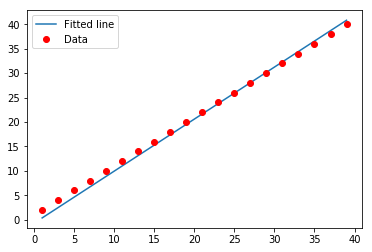

In [4]:
import matplotlib.pyplot as plt
plt.plot(setx, trained_m * setx + trained_c, label='Fitted line')
plt.plot(setx, sety, 'ro', label='Data')
plt.legend()
plt.show()

In [5]:
from tensorflow.contrib.keras import models
from tensorflow.contrib.keras import layers
from tensorflow.contrib import keras

model = models.Sequential([layers.Dense(1, input_shape=(1,))])
# Use Adam optimizier and Mean Squared Error (MSE) as loss function
model.compile(optimizer=keras.optimizers.Adamax(0.1), loss='mse') 
print model.summary() 

/home/ahmed/anaconda3/envs/hu/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________
None


In [6]:
traininglog=model.fit(setx, sety, epochs=100, batch_size=1,verbose=0)
traininglog.history['loss'][::10] # print every 10 epochs

[26.559326849784703,
 0.3059763805948023,
 0.11473879657005455,
 0.03523919541912619,
 0.008981138086710416,
 0.001470528286881745,
 0.0001888737757326453,
 9.811193740461021e-06,
 4.6839262495268487e-07,
 4.059336333739339e-09]

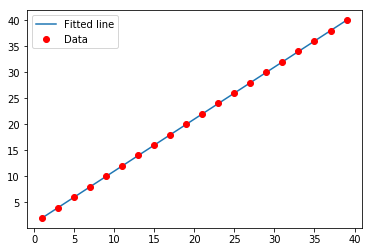

In [7]:
trained_m = model.get_weights()[0][0][0]
trained_c = model.get_weights()[1][0] 
import matplotlib.pyplot as plt
plt.plot(setx, trained_m * setx + trained_c, label='Fitted line')
plt.plot(setx, sety, 'ro', label='Data')
plt.legend()
plt.show()